# GeoTIFF to Pandas DataFrame
---
This is patched code I found online, which reads the input GeoTIFF file (.tif) per pixel. Every non-null pixel's value is saved in a DataFrame as a unique row, along with the pixel's x and y coordinates.

In [2]:
import rasterio as rio
import pandas as pd
import math

#### Input GeoTIFF file is from [Global Wind Atlas](https://globalwindatlas.info/area/Philippines) dated 2008 to 2017.
This code can essentially work with other GeoTIFF maps from the web app. However, the runtime baseline below is for a map image with dimensions of **5561 by 7671 (42,658,431 pixels)**

In [6]:
tif_file_name = "data/PHL_wind-speed_100m.tif"
with rio.open(tif_file_name) as img:
    band_id = 1 # Read the raster's first band to process the image's pixels
    band_arr = img.read(band_id)
    img_width = band_arr.shape[1]
    img_height = band_arr.shape[0]
    img_dtype = band_arr.dtype
img.close()

In [7]:
img_width, img_height

(5561, 7671)

#### Baseline runtime (Mac OS 11.2.3): 6 minutes max

In [5]:
px_vals = []

count = 0
for x in range(img_width):
    for y in range(img_height):
        count += 1
        px_val = band_arr[y, x]
        if (not(math.isnan(px_val))):
            px_vals.append({"x": x, 
                            "y": y,
                            "value": px_val})

print(count)

42658431


In [15]:
df = pd.DataFrame(px_vals, columns=["x", "y", "value"])
df

,x,y,value
0,0,5801,5.230973
1,0,5802,5.231110
2,0,5803,5.231216
3,0,5804,5.231292
4,0,5805,5.232414
...,...,...,...
22423447,4950,5957,5.187756
22423448,4950,5958,5.187970
22423449,4950,5959,5.188166
22423450,4950,5960,5.188385


In [16]:
df = df.rename(columns={"value": "windvelo"})
df

,x,y,windvelo
0,0,5801,5.230973
1,0,5802,5.231110
2,0,5803,5.231216
3,0,5804,5.231292
4,0,5805,5.232414
...,...,...,...
22423447,4950,5957,5.187756
22423448,4950,5958,5.187970
22423449,4950,5959,5.188166
22423450,4950,5960,5.188385


In [18]:
df = df.astype({"x": "int32", "y": "int32", "windvelo": "float32"})
df.dtypes

x             int32
y             int32
windvelo    float32
dtype: object

In [20]:
# !mkdir results
df.to_pickle("results/gwa0817_100m.pkl")

#### Wind speed values are in meters per second.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab255bf280>]],
      dtype=object)

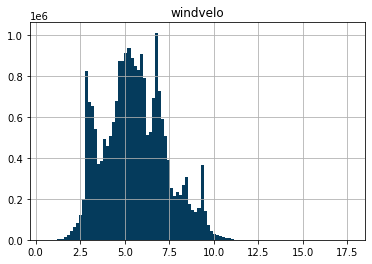

In [4]:
df.hist(column="windvelo", bins=100, color="#053B5C")

In [5]:
df.describe()

,x,y,windvelo
count,2.242345e+07,2.242345e+07,2.242345e+07
mean,2.461363e+03,4.170244e+03,5.985596e+00
std,1.074798e+03,1.803497e+03,1.743064e+00
min,0.000000e+00,9.000000e+00,5.363950e-01
25%,1.615000e+03,2.810000e+03,4.338831e+00
50%,2.406000e+03,4.384000e+03,5.492495e+00
75%,3.221000e+03,5.625000e+03,6.777289e+00
max,4.950000e+03,7.670000e+03,1.763615e+01
